In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../Data/calonpembelimobil.csv")
print(df.head)
print(df.info)

<bound method NDFrame.head of        ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0       1    32       1        0               0          240           1
1       2    49       2        1               1          100           0
2       3    52       1        0               2          250           1
3       4    26       2        1               1          130           0
4       5    45       3        0               2          237           1
..    ...   ...     ...      ...             ...          ...         ...
995   996    51       0        1               2          293           1
996   997    61       1        0               2          275           1
997   998    45       1        0               0          406           1
998   999    48       0        1               2          432           1
999  1000    40       3        1               1          380           1

[1000 rows x 7 columns]>
<bound method DataFrame.info of        ID  Usia  Status 

In [48]:
print(df.isnull().sum())

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


In [49]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Akurasi : 0.93
Matriks Kebingungan:
 [[ 89  10]
 [ 11 190]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.95      0.95      0.95       201

    accuracy                           0.93       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.93      0.93       300



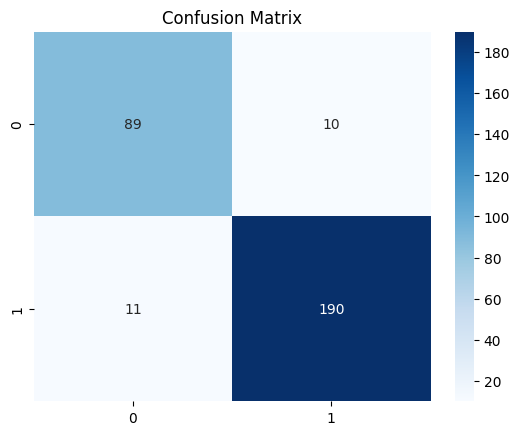

In [51]:
y_pred = model.predict(X_test)

print("Akurasi :", accuracy_score(y_test, y_pred))
print("Matriks Kebingungan:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [52]:
kolom = ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
sample = pd.DataFrame([[30, 1, 0, 0, 150]], columns=kolom)

prediksi = model.predict(sample)
print("Prediksi:", "Membeli Mobil" if prediksi[0] == 1 else "Tidak Membeli Mobil")

Prediksi: Tidak Membeli Mobil


In [53]:
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [54]:
df.tail()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1
999,1000,40,3,1,1,380,1


In [55]:
prob = model.predict_proba(sample)
print(f"Peluang Tidak Membeli Mobil: {prob[0][0]:.2f}")
print(f"Peluang Membeli Mobil: {prob[0][1]:.2f}")

Peluang Tidak Membeli Mobil: 0.97
Peluang Membeli Mobil: 0.03
